# Diffusion models

*March 15, 2024*

**[Javad Komijani (ETH Zurich)](mailto:jkomijani@gmail.com)**

# Example: SU(2)

## Data for training and test

We use `normlfow` package to generate samples for training the diffusion model and testing.
We use a pre-trained `normflow` model to generate $16 \times 1024$ samples, where 1024
samples will be used for training and the rest for making histograms.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["text.usetex"] = True

In [2]:
from normflow import Model as NormflowModel
from normflow import reverse_flow_sanitychecker

from normflow.action import MatrixAction

from normflow.prior import SUnPrior
from normflow.prior import NormalPrior

In [3]:
from normflow.nn import MultiChannelModule_
from normflow.nn import MatrixModule_
from normflow.nn import UnityDistConvertor_
from normflow.lib.matrix_handles import SU2MatrixParametrizer
from normflow.lib.matrix_handles import SU3MatrixParametrizer


def assemble_net(*, n_c, knots_len):
    
    if n_c == 2:
        par_net_ = UnityDistConvertor_(knots_len)
        matrix_handle = SU2MatrixParametrizer()
        
    elif n_c == 3:
        par_net_ = MultiChannelModule_(
            [UnityDistConvertor_(knots_len),
             UnityDistConvertor_(knots_len, symmetric=True)]
        )
        matrix_handle = SU3MatrixParametrizer()

    return MatrixModule_(par_net_, matrix_handle=matrix_handle)

In [4]:
def make_normflow_model(n_c, beta, knots_len=4):
    # Define the prior distribution
    prior = SUnPrior(n=n_c, shape=(1,))
    
    # Define the action
    action = MatrixAction(beta=beta)
    
    # Initialize the neural network for transformations
    net_ = assemble_net(n_c=n_c, knots_len=knots_len)
    
    # Create the Model with the defined components
    nf_model = NormflowModel(net_=net_, prior=prior, action=action)

    print("number of model parameters =", nf_model.net_.npar)
    
    return nf_model


# Instantiate the model
nf_model =  make_normflow_model(n_c=2, beta=6, knots_len=4)

number of model parameters = 10


In [5]:
train_the_model = False

if train_the_model:
    nf_model.train(n_epochs=5000, batch_size=1024, checkpoint_dict=dict(print_stride=100))

else:
    weights_blob = 'UEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQABIAYXJjaGl2ZS9kYXRhLnBrbEZCDgBaWlpaWlpaWlpaWlpaWoACY2NvbGxlY3Rpb25zCk9yZGVyZWREaWN0CnEAKVJxAShYFAAAAHBhcmFtX25ldF8ud2VpZ2h0c194cQJjdG9yY2guX3V0aWxzCl9yZWJ1aWxkX3RlbnNvcl92MgpxAygoWAcAAABzdG9yYWdlcQRjdG9yY2gKRG91YmxlU3RvcmFnZQpxBVgBAAAAMHEGWAMAAABjcHVxB0sDdHEIUUsASwOFcQlLAYVxColoAClScQt0cQxScQ1YFAAAAHBhcmFtX25ldF8ud2VpZ2h0c195cQ5oAygoaARoBVgBAAAAMXEPaAdLA3RxEFFLAEsDhXERSwGFcRKJaAApUnETdHEUUnEVWBQAAABwYXJhbV9uZXRfLndlaWdodHNfZHEWaAMoKGgEaAVYAQAAADJxF2gHSwR0cRhRSwBLBIVxGUsBhXEaiWgAKVJxG3RxHFJxHXV9cR5YCQAAAF9tZXRhZGF0YXEfaAApUnEgKFgAAAAAcSF9cSJYBwAAAHZlcnNpb25xI0sBc1gKAAAAcGFyYW1fbmV0X3EkfXElaCNLAXNYEgAAAHBhcmFtX25ldF8uc29mdG1heHEmfXEnaCNLAXNYEwAAAHBhcmFtX25ldF8uc29mdHBsdXNxKH1xKWgjSwFzdXNiLlBLBwh7G/bG5gEAAOYBAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAABEAGwBhcmNoaXZlL2J5dGVvcmRlckZCFwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWmxpdHRsZVBLBwiFPeMZBgAAAAYAAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA4APgBhcmNoaXZlL2RhdGEvMEZCOgBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaDfKRUKhD5z8g7yF5No7cP31wazzdYOm/UEsHCEDih78YAAAAGAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADgAsAGFyY2hpdmUvZGF0YS8xRkIoAFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlrOOVCkNx7gv4GEB2iwZc+/yiCbcxd63j9QSwcIe3rF6hgAAAAYAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAOACwAYXJjaGl2ZS9kYXRhLzJGQigAWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWtHJDrKWGfy/SJquBq1w9r9/K0fR8EfLP7XfEBcwZAJAUEsHCOgaWpsgAAAAIAAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAADwAjAGFyY2hpdmUvdmVyc2lvbkZCHwBaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaMwpQSwcI0Z5nVQIAAAACAAAAUEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAeADIAYXJjaGl2ZS8uZGF0YS9zZXJpYWxpemF0aW9uX2lkRkIuAFpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlowNzIxMjY2NTk3NDg4NjkyNjU4NjA2NzE3MTA5NDIwNTQ3MzQwMzE3UEsHCEufA+MoAAAAKAAAAFBLAQIAAAAACAgAAAAAAAB7G/bG5gEAAOYBAAAQAAAAAAAAAAAAAAAAAAAAAABhcmNoaXZlL2RhdGEucGtsUEsBAgAAAAAICAAAAAAAAIU94xkGAAAABgAAABEAAAAAAAAAAAAAAAAANgIAAGFyY2hpdmUvYnl0ZW9yZGVyUEsBAgAAAAAICAAAAAAAAEDih78YAAAAGAAAAA4AAAAAAAAAAAAAAAAAlgIAAGFyY2hpdmUvZGF0YS8wUEsBAgAAAAAICAAAAAAAAHt6xeoYAAAAGAAAAA4AAAAAAAAAAAAAAAAAKAMAAGFyY2hpdmUvZGF0YS8xUEsBAgAAAAAICAAAAAAAAOgaWpsgAAAAIAAAAA4AAAAAAAAAAAAAAAAAqAMAAGFyY2hpdmUvZGF0YS8yUEsBAgAAAAAICAAAAAAAANGeZ1UCAAAAAgAAAA8AAAAAAAAAAAAAAAAAMAQAAGFyY2hpdmUvdmVyc2lvblBLAQIAAAAACAgAAAAAAABLnwPjKAAAACgAAAAeAAAAAAAAAAAAAAAAAJIEAABhcmNoaXZlLy5kYXRhL3NlcmlhbGl6YXRpb25faWRQSwYGLAAAAAAAAAAeAy0AAAAAAAAAAAAHAAAAAAAAAAcAAAAAAAAAugEAAAAAAAA4BQAAAAAAAFBLBgcAAAAA8gYAAAAAAAABAAAAUEsFBgAAAAAHAAcAugEAADgFAAAAAA=='
    nf_model.net_.set_weights_blob(weights_blob)

#### Create a data loader for training the diffusion model

In [6]:
from normflow.lib.matrix_handles import SU2Algebra2Group_
from normflow.lib.matrix_handles import SU3Algebra2Group_

In [7]:
# Generate 16 * 1024 samples, use 4096 for training and all for making histograms
nf_samples = nf_model.mcmc.sample(1024 * 16)
nf_alg_samples = SU2Algebra2Group_().reverse(nf_samples)[0]

print("acceptance rate of normflow model: %.4g" % nf_model.mcmc.history.accept_rate[-1])

acceptance rate of normflow model: 0.9911


In [8]:
# Use 1024 * 4 for training 

training_samples = nf_samples[4096::3]
training_alg_samples = nf_alg_samples[4096::3]

print("shape of training data", training_samples.shape, training_alg_samples.shape)

shape of training data torch.Size([4096, 1, 2, 2]) torch.Size([4096, 1, 3])


# Creating and training a diffusion model

Similar to [normflow](https://github.com/jkomijani/normflow) package,
one should provide three essential components for a diffusion model:

*   A **prior distribution** to draw initial samples in the reverse process for
    genearting samples.
*   A **diffusion process**, which consists of neural network that models
    **score function**, which can be used to perform the reverse process.
*   An **action** that specifies the target distribution, defining the goal of the generative model.
  
The central high-level class of the package is called `Model`, which can be instantiated by
providing instances of the three objects mentioned above as


```python
Model(
    prior = prior,
    diffusion_process = DiffusionProcess(reduced_score_func),
    action = action
    )
```

Unlike the functions used in the method of normalizing flows,
**score function** does not need to be invertible.

Before we continue, let us create a dummy `DiffusionProcess` without any score
function and see the effect of the diffusion process.

In [9]:
from diffusion_model import SUnDiffusionProcess

diff_proc = SUnDiffusionProcess(None)

t_eval = np.linspace(0, 1, 200)

diffused_samples = diff_proc.run_diffusion_process(nf_samples, t_eval=t_eval)

In [10]:
theta = [torch.linalg.eig(sample)[0].angle() for sample in diffused_samples]

In [11]:
# Useful for plotting:

grab = lambda x: x.detach().cpu().numpy()

theta = np.array([grab(q) for q in theta])

shape = theta.shape
print("shape =", shape)

t_eval = np.tile(t_eval[:, None], (1, np.prod(shape[1:]))).reshape(*shape)

shape = (200, 16384, 1, 2)


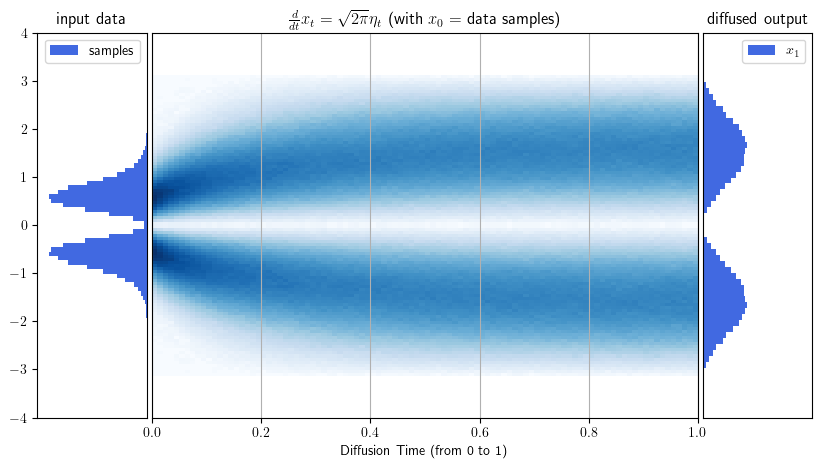

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5), gridspec_kw={'width_ratios': [0.2, 1, 0.2]})

axs[1].hist2d(t_eval.ravel(), theta.ravel(), norm=mpl.colors.PowerNorm(0.5), cmap='Blues', bins=100);

hist_kwargs = dict(bins=50, color='royalblue', density=True, orientation='horizontal')

axs[0].hist(theta[0].ravel(), label="samples", **hist_kwargs)
axs[2].hist(theta[-1].ravel(), label=r"$x_1$", **hist_kwargs)
axs[0].invert_xaxis()  # Invert x-axis to place histogram to the left

# Add
# x_0 = torch.linspace(-8.0, 8.0, 100)
# axs[0].plot(grab(calc_normalized_probability(nf_model, x_0)), grab(x_0), '--k', label="PDF")
# axs[2].plot(grab(torch.exp(-x_0**2 / 2)) / (2*np.pi)**0.5, grab(x_0), '--k', label="Gaussian")

# Remove undesired axis ticks and labels
axs[1].set_yticks([])
axs[2].set_yticks([])
axs[0].set_xticks([])
axs[2].set_xticks([])

# Add title
axs[0].set_title("input data")
axs[1].set_title(r"$\frac{d}{dt}  x_t = \sqrt{2 \pi} \eta_t$  (with $x_0 = $ data samples)")
axs[2].set_title("diffused output")

# Set ylim
axs[0].set_ylim([-4, 4])
axs[1].set_ylim([-4, 4])
axs[2].set_ylim([-4, 4])
axs[0].set_xlim([0.8, 0])
axs[2].set_xlim([0, 0.8])

# Decrease horizontal spacing between subplots
plt.subplots_adjust(wspace=0.02)

# Add legend
axs[0].legend()
axs[1].grid()
axs[2].legend()

axs[1].set_xlabel(r'Diffusion Time (from 0 to 1)');

fig.savefig("diffusion_process.jpg")

## Score function

We now give a simple neural networ for the reduced score function and a more
advanced one based on *time embedding*. We will see that the simple one
performs in general even better that the time-embedded one in the case of
1 degree of freedom, but for higher dimensional problems one should use
time embedded neural networks.

In [13]:
def make_traceless(matrix: torch.Tensor) -> torch.Tensor:
    """Removes the trace component from a square matrix."""
    # Compute the mean trace across the last two dimensions
    trace_mean = matrix.diagonal(dim1=-2, dim2=-1).mean(dim=-1, keepdim=True)
    
    # Subtract the mean trace from the diagonal elements
    return matrix - torch.diag_embed(trace_mean.expand(matrix.shape[:-1]))


class SU2ScoreFunc(torch.nn.Module):
    """A score function for SU(2) matrices.

    This model takes as input the time `t` and the initial state matrix `x`
    and predicts a transformation score while ensuring the output remains
    antihermitian and traceless.

    The network consists of fully connected layers with SiLU activations.

    Attributes:
        net: A sequential model composed of linear layers and activations.
    """

    def __init__(self, hidden_sizes: list[int] = [32, 32, 32, 32]):
        """Initializes the SU2ScoreFunc neural network."""
        super().__init__()

        in_features = 9  # Inputs: (t, trace.real, trace.imag)
        out_features = 8  # Outputs: Score

        layer_sizes = [in_features, *hidden_sizes, out_features]
        layers = []

        # Construct the network layers
        for i in range(len(layer_sizes) - 1):
            layers.append(torch.nn.Linear(layer_sizes[i], layer_sizes[i + 1]))
            if i < len(layer_sizes) - 2:  # No activation for the last layer
                layers.append(torch.nn.SiLU())

        self.net = torch.nn.Sequential(*layers)

    def forward(self, t: torch.Tensor, x: torch.Tensor) -> torch.Tensor:
        """Computes the forward pass of the SU2 score function.

        Given a time `t` and a matrix `x`, the function processes the input
        through the neural network and applies post-processing to ensure the
        output is antihermitian and traceless.

        Args:
            - t (torch.Tensor): A 0D or 1D tensor representing time.
              If 1D, it is of shape (batch_size,)
            - x (torch.Tensor): A complex-valued input tensor of shape
              (batch_size, 1, 2, 2).

        Returns:
            - torch.Tensor: A antihermitian, traceless score tensor of shape
              (batch_size, 1, 2, 2).
        """
        # Ensure t is a batch tensor
        if t.ndim == 0:
            t = t.repeat(x.shape[0])

        # Reshape x and extract real & imaginary parts as features
        x_flattened = x.reshape(-1, 4)
        x = torch.cat([t[:, None], x_flattened.real, x_flattened.imag], dim=-1)

        # Forward pass through the network
        x = self.net(x)

        # Convert the output to a complex tensor with appropriate shape
        x = torch.view_as_complex(x.reshape(-1, 1, 2, 2, 2))

        # Ensure the output is antihermitian and traceless
        return make_traceless(x - x.adjoint())

In [14]:
# Now the build the model

from diffusion_model import Model


def make_model():
    model = Model(
        prior = nf_model.prior,
        action = nf_model.action,
        diffusion_process = SUnDiffusionProcess(SU2ScoreFunc())
    )
    return model

In [15]:
from torch.utils.data import Dataset, DataLoader, TensorDataset

batch_size = 256

dataset = TensorDataset(training_samples)

data_loader = DataLoader(
    dataset,
    batch_size = batch_size,
    shuffle = False
)


dataset = TensorDataset(training_samples)

data_loader = DataLoader(
    dataset,
    batch_size = batch_size,
    shuffle = False
)

In [16]:
from functools import partial

n_epochs = 100

fit_kwargs = dict(
    n_epochs = n_epochs,
    n_timesteps = 1000,
    hyperparam = dict(lr=0.01, betas=(0.9, 0.99)),
    checkpoint_dict = dict(print_every=10),
    scheduler = partial(
                torch.optim.lr_scheduler.CosineAnnealingLR,                     
                T_max = int(1.01 * n_epochs)                                    
                )
)

In [17]:
su2_diffusion_model = make_model()
su2_diffusion_model.train(data_loader, **fit_kwargs)

>>> Training started for 100 epochs <<<
Epoch: 10 | loss: 0.7001
Epoch: 20 | loss: 0.6798
Epoch: 30 | loss: 0.6989
Epoch: 40 | loss: 0.6874
Epoch: 50 | loss: 0.6953
Epoch: 60 | loss: 0.6903
Epoch: 70 | loss: 0.7028
Epoch: 80 | loss: 0.6841
Epoch: 90 | loss: 0.6842
Epoch: 100 | loss: 0.6770
>>> Training finished (cpu); TIME = 249 sec <<<


Text(0, 0.5, 'Loss')

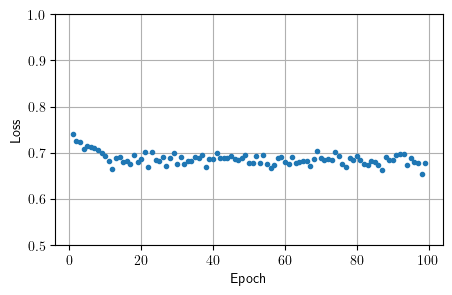

In [18]:
fig, axs = plt.subplots(1, 1, figsize=(5, 3))

loss = su2_diffusion_model.train.train_history['loss'][1:]
epochs = np.arange(1, len(loss) + 1)
plt.plot(epochs, loss, '.')
# plt.xlim([0, 200])
plt.ylim([0.5, 1])
plt.grid()
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [19]:
x = su2_diffusion_model.prior.sample(1024 * 16)
with torch.no_grad():
    y = su2_diffusion_model.denoising_flow.forward(x)

In [20]:
theta_x = [torch.linalg.eig(sample)[0].angle() for sample in x]
theta_y = [torch.linalg.eig(sample)[0].angle() for sample in y]

theta_test = [torch.linalg.eig(sample)[0].angle() for sample in nf_samples]

In [21]:
theta_x = np.array([grab(q) for q in theta_x])
theta_y = np.array([grab(q) for q in theta_y])
theta_test = np.array([grab(q) for q in theta_test])

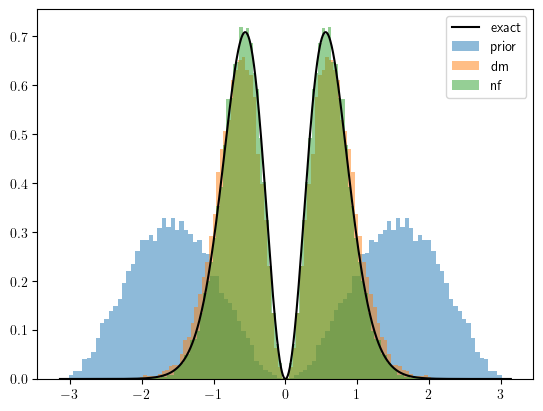

In [22]:
from scipy.special import iv as bessel_i  # bessel function I_v

su2_norm = lambda beta: beta / (2 * np.pi * bessel_i(1, beta))  # page 916, 8.431.6

beta = 6
x = np.linspace(-1, 1, 1000) * np.pi
plt.plot(x, np.sin(x)**2  * np.exp(beta * np.cos(x)) * su2_norm(beta), 'k', label='exact')


plt.hist(theta_x.ravel(), label = 'prior', bins=100, density=True, alpha=0.5)
plt.hist(theta_y.ravel(), label = 'dm', bins=100, density=True, alpha=0.5)
plt.hist(theta_test.ravel(), label = 'nf', bins=100, density=True, alpha=0.5)

plt.legend();